In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Usa Housing Dataset.csv")
df = df.drop(columns=["city"])  

for col in list(df.columns):
    if col in df.columns:  
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col], format="%Y-%m-%d", errors='coerce') 
            except Exception:
                df = df.drop(columns=[col])  
            
        if col in df.columns and df[col].dtype == 'datetime64[ns]':
            df[col] = df[col].astype('int64') 
        elif col in df.columns:
            df[col] = df[col].astype(int)



X = df.drop(columns=["price"])
y = df["price"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.3 MB/s eta 0:01:56
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:00
   ---------------------------------------- 1.0/150.0 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 1.3/150.0 MB 1.2 MB/s eta 0:02:00
   ---------------------------------------- 1.6/150.0 MB 1.2 MB/s eta 0:02:01
   ---------------------------------------- 1.8/150.0 MB 1.2 MB/s eta 0:02:01
    --------------------------------------- 2.1/150.0 MB 1.2 MB/s eta 0:02:00
    --------------------------------------- 2.4/150.0 MB 1.2 MB/s eta 0:02:00
    --------------------------------------- 2.6/150.0 MB 1.2 MB/s eta 0:02:00
    --------------------------------------- 2.9/150.0 MB 1.2 MB/s eta 0:02:01
    --------------------------------------- 3.1/150.0 MB 1.2 MB/s eta 0:02:00


Untuned MSE: 78790098944.0000
Tuned MSE: 68327608320.0000
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


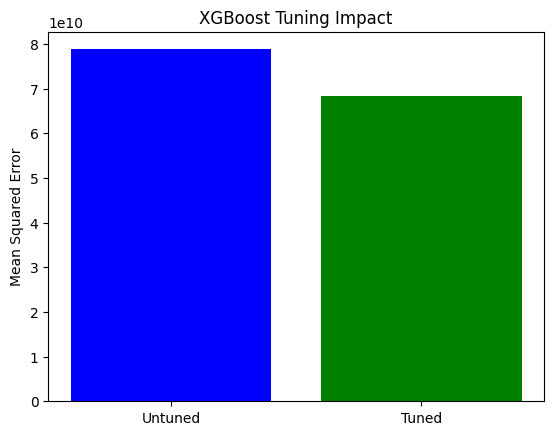

In [15]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_untuned = mean_squared_error(y_test, y_pred)

param_grid = {
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f"Untuned MSE: {mse_untuned:.4f}")
print(f"Tuned MSE: {mse_tuned:.4f}")
print("Best Parameters:", grid_search.best_params_)

plt.bar(["Untuned", "Tuned"], [mse_untuned, mse_tuned], color=["blue", "green"])
plt.ylabel("Mean Squared Error")
plt.title("XGBoost Tuning Impact")
plt.show()